enter the number of variables: 3
Enter the initial population size: 10
Enter the minimum value of X: -1.28
Enter the maximum value of X: 1.28
Enter the max number of iterations: 10

Ite:  0

Gbest 1.9718220612181827

Ite:  1

Gbest 1.523535856627454

Ite:  2

Gbest 0.7392417745353733

Ite:  3

Gbest 1.3639982927631495

Ite:  4

Gbest 1.0052820307371622

Ite:  5

Gbest 2.0946444140522966

Ite:  6

Gbest 1.6760120772424836

Ite:  7

Gbest 1.6885156306853515

Ite:  8

Gbest 2.2989605103209154

Ite:  9

Gbest 2.371140087902199
[[-0.08717641 -0.4701633   0.20600337]
 [-0.04612376  0.1906266   0.04866743]
 [-0.25052771  0.32843957  0.59395197]
 [-0.05770737 -0.39496515  0.02705287]
 [-0.75259792 -0.38615782 -0.22904322]
 [-0.18349053  0.63273666 -0.00755209]
 [-0.25052771  0.32843957  0.59395197]
 [-0.25052771  0.32843957  0.59395197]
 [-0.68256373 -0.34287854 -0.08483006]
 [ 0.03282532  0.13732446  0.10784231]
 [-0.25052771  0.32843957  0.59395197]]
[1.0406619  1.44916303 2.65629218 1.90849

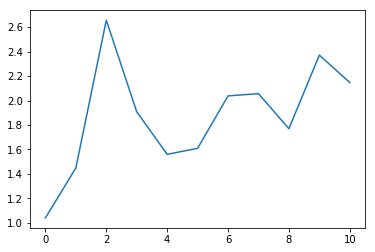

In [46]:
#Generating Initial Population
import numpy as np
import matplotlib.pyplot as plt
d=int(input("enter the number of variables: "))
N=int(input("Enter the initial population size: "))
xmin=float(input("Enter the minimum value of X: "))
xmax=float(input("Enter the maximum value of X: "))
iterations=int(input("Enter the max number of iterations: "))
def POP(d,N,xmin,xmax):
    return ((np.random.rand(N,d))*(2*xmax))-xmax
pop=POP(d,N,xmin,xmax)
#intial setup
def cfun(a):
    l=0
    for ind, value in np.ndenumerate(a):
        o=(int(ind[0])+1)*(value**4)+np.random.rand()
        l+=o
    return l

def GBEST(pbest):
    cost=np.apply_along_axis(cfun,1,pbest)
    gbestcost=np.argmin(cost)
    return np.array([pbest[gbestcost,:]])
def setup(pop):
    cost=np.apply_along_axis(cfun,1,pop)
    pbest=np.copy(pop)
    v=np.zeros((N,d))
    gbest= GBEST(pbest)
    GBests=np.zeros((iterations+1,d))
    GBests[0]=gbest
    return cost, pbest, v, gbest, GBests
cost, pbest, v, gbest, GBests= setup(pop)
#updating v,x,pbest,gbest
for x in range(0,iterations):
    for i in range(0,N):
        for j in range(0,d):
            v[i,j]+=(2*(np.random.rand())*(pbest[i,j]-pop[i,j]))+(2*(np.random.rand())*(gbest[0,j]-pop[i,j]))
            z=pop[i,j]+v[i,j]
            if z<=xmin:
                pop[i,j]=xmin
            elif z>=xmax:
                pop[i,j]=xmax
            else:
                pop[i,j]=z
        if cfun(pop[i])<cfun(pbest[i]):
            pbest[i]=pop[i]
    gbest= GBEST(pbest)
    GBests[x+1]=gbest
print(GBests)
GBestscost=np.apply_along_axis(cfun,1,np.array(GBests))
print(GBestscost)
plt.plot(GBestscost)
plt.show()